In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [252]:
dataset = pd.read_csv('data_sal.csv')

In [253]:
dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [254]:
dataset.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [255]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [256]:
dataset.shape

(3755, 11)

In [257]:
dataset.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [258]:
str_cols = dataset.select_dtypes('O').columns
str_cols

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

<Axes: xlabel='work_year'>

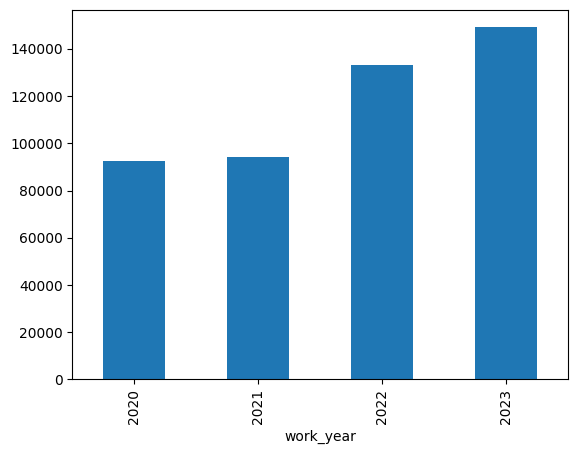

In [259]:
dataset.groupby('work_year').salary_in_usd.mean().plot.bar()

<Axes: xlabel='company_size'>

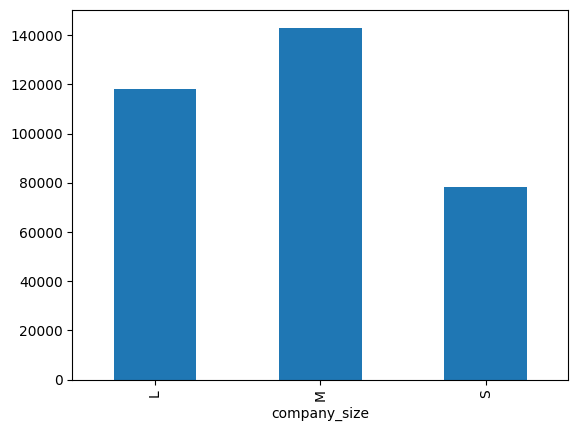

In [260]:
dataset.groupby('company_size').salary_in_usd.mean().plot.bar()

In [261]:
dataset.employment_type.unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [262]:
dataset.experience_level.unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [263]:
dataset.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [264]:
dataset.job_title.value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

In [265]:
dataset.job_title.str.findall(r"[A-Z]* *Data Scientist").value_counts()

job_title
[]                   2884
[Data Scientist]      842
[ Data Scientist]      29
Name: count, dtype: int64

In [266]:
dataset.job_title.str.findall(r"[A-Z]* *Data Analyst").value_counts()

job_title
[]                   3093
[Data Analyst]        612
[ Data Analyst]        35
[BI Data Analyst]      15
Name: count, dtype: int64

<Axes: ylabel='count'>

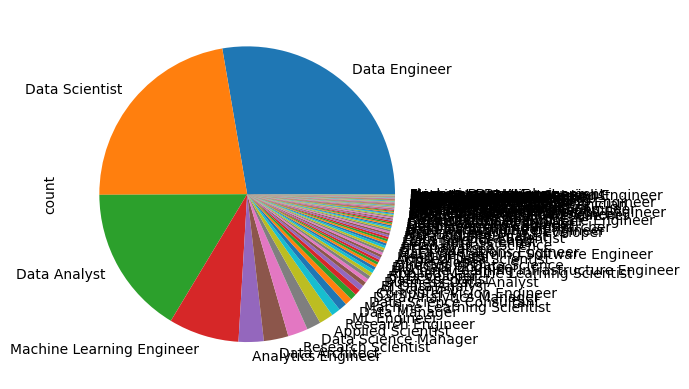

In [267]:
dataset.job_title.value_counts().plot.pie()

In [268]:
dataset.job_title.str.findall(r"BI").value_counts()

job_title
[]      3716
[BI]      39
Name: count, dtype: int64

In [269]:
dataset.employee_residence.nunique()

78

In [270]:
dataset.employee_residence.value_counts().sort_values().head(60)

employee_residence
MT    1
DZ    1
NZ    1
JE    1
MY    1
MD    1
IQ    1
LU    1
RS    1
HN    1
EE    1
TN    1
CR    1
BG    1
EG    1
ID    1
CY    1
AM    1
BA    1
MK    1
IL    1
KW    1
IR    1
SK    1
CN    1
DO    1
MA    1
HK    2
UZ    2
PH    2
CF    2
CL    2
SE    2
CZ    2
AS    2
LT    2
GH    2
FI    2
KE    2
VN    3
TH    3
BO    3
DK    3
AE    3
HU    3
RO    3
HR    3
SI    4
CH    4
UA    4
LV    4
RU    4
CO    4
PR    5
SG    5
BE    5
TR    5
AT    6
PL    6
AR    6
Name: count, dtype: int64

In [271]:
dataset.employee_residence.value_counts().sort_values().tail(18)

employee_residence
NG       7
IE       7
JP       7
PK       8
IT       8
MX      10
AU      11
NL      15
GR      16
PT      18
BR      18
FR      38
DE      48
IN      71
ES      80
CA      85
GB     167
US    3004
Name: count, dtype: int64

In [272]:
index = dataset.employee_residence.value_counts().sort_values().to_dict().keys()

In [273]:
dataset.company_location.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [274]:
dataset.company_location.value_counts().head(20)

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
AU      14
GR      14
PT      14
NL      13
MX      10
IE       7
SG       6
AT       6
JP       6
TR       5
CH       5
NG       5
Name: count, dtype: int64

In [275]:
dataset.company_location.value_counts().tail(20)

company_location
NZ    1
CN    1
IQ    1
DZ    1
HK    1
HN    1
MY    1
AL    1
MA    1
PH    1
BO    1
VN    1
AM    1
BA    1
SK    1
MK    1
BS    1
IR    1
CR    1
MT    1
Name: count, dtype: int64

<Axes: ylabel='employee_residence'>

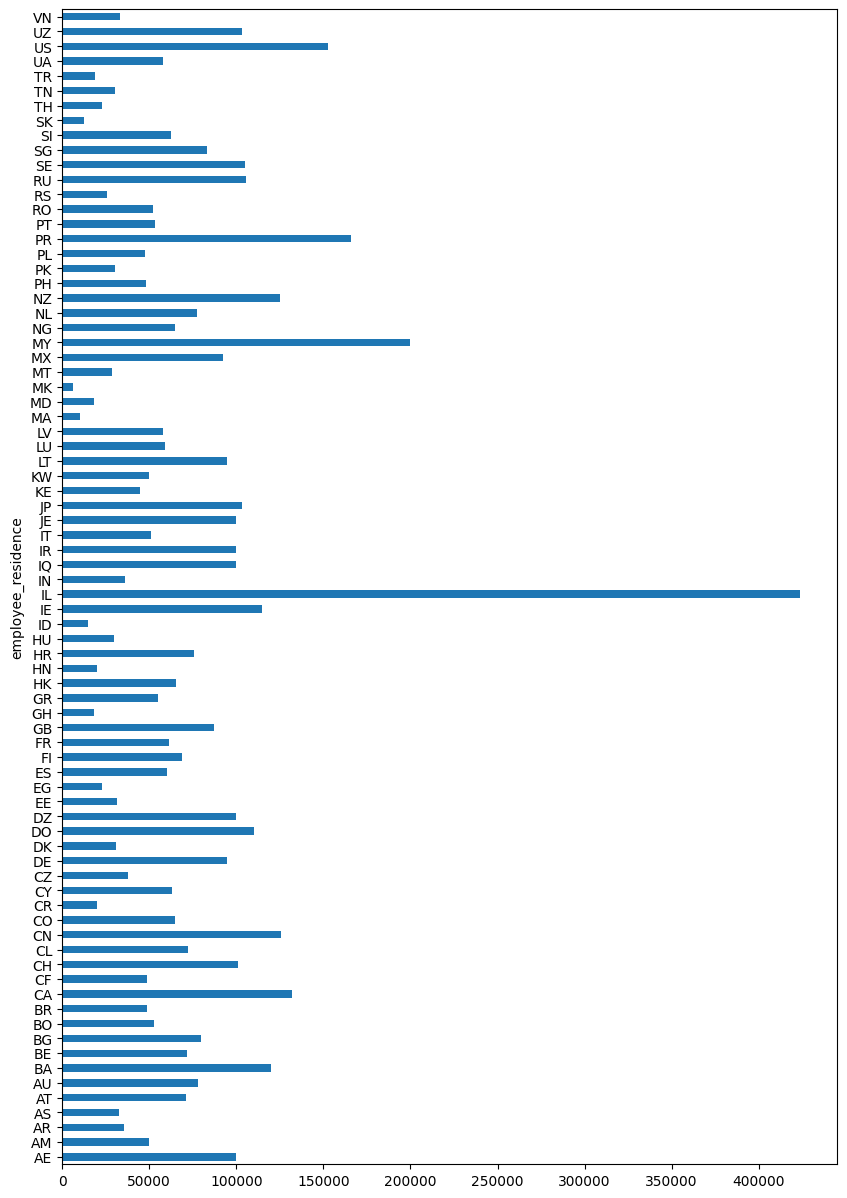

In [276]:
plt.subplots(nrows=1,ncols=1,figsize=(10,15))
dataset.groupby('employee_residence').salary_in_usd.mean().sort_index().plot.barh()

the number of unique residences are more , we can't perform the one hot encoding.
Instead of maintaining all the countries we will consider top 10 countries and consider the remaining countries as class other

In [277]:
dataset[str_cols].head()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,SE,FT,Principal Data Scientist,EUR,ES,ES,L
1,MI,CT,ML Engineer,USD,US,US,S
2,MI,CT,ML Engineer,USD,US,US,S
3,SE,FT,Data Scientist,USD,CA,CA,M
4,SE,FT,Data Scientist,USD,CA,CA,M


In [278]:
dataset[str_cols].nunique()

experience_level       4
employment_type        4
job_title             93
salary_currency       20
employee_residence    78
company_location      72
company_size           3
dtype: int64

In [279]:
num_cols = dataset.select_dtypes(include=[int,float]).columns

In [280]:
num_cols

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

In [281]:
dataset[num_cols].head()

,work_year,salary,salary_in_usd,remote_ratio
0,2023,80000,85847,100
1,2023,30000,30000,100
2,2023,25500,25500,100
3,2023,175000,175000,100
4,2023,120000,120000,100


In [282]:
dataset[num_cols].nunique()

work_year           4
salary            815
salary_in_usd    1035
remote_ratio        3
dtype: int64

In [283]:
dataset.work_year.value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

In [284]:
dataset2 = dataset.copy()

In [285]:
dataset2.work_year = dataset2.work_year.map({2023:4,2022:3,2021:2,2020:1})

In [286]:
dataset2.work_year.value_counts()

work_year
4    1785
3    1664
2     230
1      76
Name: count, dtype: int64

In [287]:
dataset2.salary.min()

6000

In [288]:
dataset2.salary.mean(),dataset2.salary.max()

(190695.57177097205, 30400000)

In [289]:
dataset2.remote_ratio.value_counts()

remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64

In [290]:
dataset2.remote_ratio = dataset2.remote_ratio.map({0:-1,50:0,100:1})

In [291]:
dataset2.remote_ratio.value_counts()

remote_ratio
-1    1923
 1    1643
 0     189
Name: count, dtype: int64

In [292]:
unique_countries = dataset2.employee_residence.value_counts().sort_values(ascending=False).head(10).to_dict().keys()
unique_countries = list(unique_countries)
unique_countries

['US', 'GB', 'CA', 'ES', 'IN', 'DE', 'FR', 'PT', 'BR', 'GR']

In [293]:
dataset2.employee_residence = dataset2.employee_residence.apply(lambda p : unique_countries.index(p)+1 if p in unique_countries else 11)

In [294]:
dataset2.employee_residence

0       4
1       1
2       1
3       3
4       3
       ..
3750    1
3751    1
3752    1
3753    1
3754    5
Name: employee_residence, Length: 3755, dtype: int64

In [295]:
dataset2.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,4,SE,FT,Principal Data Scientist,80000,EUR,85847,4,1,ES,L
1,4,MI,CT,ML Engineer,30000,USD,30000,1,1,US,S
2,4,MI,CT,ML Engineer,25500,USD,25500,1,1,US,S
3,4,SE,FT,Data Scientist,175000,USD,175000,3,1,CA,M
4,4,SE,FT,Data Scientist,120000,USD,120000,3,1,CA,M


In [296]:
dataset2.experience_level.unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [297]:
dataset2.experience_level = dataset2.experience_level.map({'SE':1,'MI':2,'EN':3,'EX':4})

In [298]:
dataset2.employment_type.unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [299]:
dataset2.employment_type = dataset2.employment_type.map({'FT':1,'CT':2,'FL':3,'PT':4})

We are dropping the salary and salary_currency because they both can be represented by salary_in_usd column

In [300]:
dataset2.drop(['salary','salary_currency'],axis=1,inplace=True)

In [301]:
dataset2.company_size.value_counts()

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

In [302]:
dataset2.company_size = dataset2.company_size.map({'L':3,'M':2,'S':1})

In [303]:
unique_location = dataset2.company_location.value_counts().sort_values(ascending=False).head(10).to_dict().keys()
unique_location = list(unique_location)
unique_location

['US', 'GB', 'CA', 'ES', 'IN', 'DE', 'FR', 'BR', 'PT', 'GR']

In [304]:
dataset2.company_location = dataset2.company_location.apply(lambda p : unique_location.index(p)+1 if p in unique_location else 11)

In [305]:
dataset2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,4,1,1,Principal Data Scientist,85847,4,1,4,3
1,4,2,2,ML Engineer,30000,1,1,1,1
2,4,2,2,ML Engineer,25500,1,1,1,1
3,4,1,1,Data Scientist,175000,3,1,3,2
4,4,1,1,Data Scientist,120000,3,1,3,2


In [306]:
dataset2.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

We have a different variants of jobs releated to :"Data Analyst","Machine Learning","Data Engineering","Data Science","Power BI","Developer","Lead"
The above variants will be created as columns and the all the job_titles are mapped to these columns.

In [307]:
dataset2.job_title = dataset2.job_title.str.replace('Machine Learning','ML')

In [308]:
print('Machine Learning' in 'Machine Learning Developer')

True


In [309]:
dataset2.job_title.apply(lambda p : 1 if 'Data Engineer' in p else 0).value_counts()

job_title
0    2688
1    1067
Name: count, dtype: int64

In [310]:
new_cols = ["Analyst","ML","Data Engineer","Data Science","BI","Developer","Lead",'Deep Learning']
for col in new_cols:
    dataset2[col] = dataset2.job_title.apply(lambda p : 1 if col in p else 0)

In [311]:
dataset2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Analyst,ML,Data Engineer,Data Science,BI,Developer,Lead,Deep Learning
0,4,1,1,Principal Data Scientist,85847,4,1,4,3,0,0,0,0,0,0,0,0
1,4,2,2,ML Engineer,30000,1,1,1,1,0,1,0,0,0,0,0,0
2,4,2,2,ML Engineer,25500,1,1,1,1,0,1,0,0,0,0,0,0
3,4,1,1,Data Scientist,175000,3,1,3,2,0,0,0,0,0,0,0,0
4,4,1,1,Data Scientist,120000,3,1,3,2,0,0,0,0,0,0,0,0


In [313]:
dataset2.drop('job_title',axis=1,inplace=True)

In [314]:
dataset2.head()

,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Analyst,ML,Data Engineer,Data Science,BI,Developer,Lead,Deep Learning
0,4,1,1,85847,4,1,4,3,0,0,0,0,0,0,0,0
1,4,2,2,30000,1,1,1,1,0,1,0,0,0,0,0,0
2,4,2,2,25500,1,1,1,1,0,1,0,0,0,0,0,0
3,4,1,1,175000,3,1,3,2,0,0,0,0,0,0,0,0
4,4,1,1,120000,3,1,3,2,0,0,0,0,0,0,0,0


In [327]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

In [317]:
X_train,X_test,y_train,y_test = train_test_split(dataset2.drop('salary_in_usd',axis=1),dataset2.salary_in_usd,test_size=0.2,random_state=34)

## Decision Tree Regressor


In [318]:
rdt = DecisionTreeRegressor()
rdt.fit(X_train,y_train)

DecisionTreeRegressor()

## Linear Regressor

In [319]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [329]:
elr = ElasticNet()
elr.fit(X_train,y_train)

ElasticNet()

## SVM

In [320]:
rsv = SVR()
rsv.fit(X_train,y_train)

SVR()

*Prediction*

In [330]:
y_pred_dt = rdt.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_svm = rsv.predict(X_test)
y_pred_elr = elr.predict(X_test)

In [341]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [346]:
print("Linear Regression",r2_score(y_test,y_pred_lr))
print("Decision Tree",r2_score(y_test,y_pred_dt))
print("SVM regression",r2_score(y_test,y_pred_svm))
print("ElasticNet",r2_score(y_test,y_pred_elr))

Linear Regression 0.2619082464552982
Decision Tree 0.2874164765575131
SVM regression -0.005576834903448846
ElasticNet 0.2218434151950749
